<h1> An Analysis of Global Deforestation </h1>
<h3> By Kira Fallen </h3>

<h2>Introduction</h2>
In order to demonstrate the data science lifecycle, I will be doing an analysis of global deforestation and its effects on our world. Deforestation is the purposeful clearing of forested land most commonly for agriculture, cattle grazing, urbanization, or to obtain wood for fuel. Deforestation has been occurring around the globe for thousands of years; For example, 2000 years ago, 80 percent of Western Europe was forested whereas today only 34 percent is forested (<a href='https://education.nationalgeographic.org/resource/deforestation/'>Nat Geo</a>). Today, the greatest amount of deforestation is occurring in tropical rainforests (<a href='https://education.nationalgeographic.org/resource/deforestation/'>Nat Geo</a>). In the Amazon around 17% of the forest has been lost in the last 50 years (<a href='https://www.worldwildlife.org/threats/deforestation-and-forest-degradation'>WWL</a>). <br> <br>
So, why should we care about deforestation? Forests cover 31 percent of the land area on our planet and are home to more than three-quarters of the world’s life on land (<a href='https://www.worldwildlife.org/threats/deforestation-and-forest-degradation'>WWL</a>). Tropical forests, despite only covering about 7 percent of the Earth’s dry land, probably hold about half of all species on Earth (<a href='https://mynasadata.larc.nasa.gov/basic-page/deforestation'>NASA</a>). The planet’s biodiversity is severely threatened by widespread deforestation, especially as tropical forests continue to be destroyed at extreme rates. Many species found in the tropical rain forests can only be found in small areas, making them more likely to die out during and after deforestation (<a href='https://mynasadata.larc.nasa.gov/basic-page/deforestation'>NASA</a>). Additionally, when an area is completely deforested for farming, the farmer typically burns what is left and the minerals in the soil are lost (<a href='https://mynasadata.larc.nasa.gov/basic-page/deforestation'>NASA</a>). In just a few years, soils often become unable to support crops. If the area is then turned into cattle pasture, it becomes nearly impossible for the forest to ever be restored (<a href='https://mynasadata.larc.nasa.gov/basic-page/deforestation'>NASA</a>). Forests are also important mitigators of climate change because they act as a carbon sink, taking in carbon dioxide that would otherwise be free in the atmosphere and contributing to global warming (<a href='https://www.worldwildlife.org/threats/deforestation-and-forest-degradation'>WWL</a>). Deforestation—both the actual process in which forests are destroyed and the aftermath (less forest area on earth)—is a contributor to the large carbon dioxide emissions (<a href='https://education.nationalgeographic.org/resource/deforestation/'>Nat Geo</a>). Deforestation can also impact air quality. Widespread burning of forests produces air pollution that can be risky for both human and animal health. Additionally, reducing forest coverage can impact air quality as trees are extremely important for maintaining good air. Read more about the relation between air pollution and deforestation: <a href='https://blog.alomoves.com/news/how-deforestation-impacts-air-quality-and-5-ways-to-make-a-difference-today#:~:text=When%20vast%20areas%20of%20trees,the%20risk%20of%20forest%20fires'>here</a> and <a href='https://www.hrw.org/report/2020/08/26/air-unbearable/health-impacts-deforestation-related-fires-brazilian-amazon'>here</a>. <br>

From <a href="https://www.cfr.org/amazon-deforestation/#/en">CFR.org</a>
After reducing its forest clearance by 80 percent between 2005 and 2012 and dramatically reducing its emissions, Brazil has since increased deforestation, and in 2021, it reached a fifteen-year high. The Amazon was long considered the world’s largest carbon sink. But scientists say parts of the forest now emit more carbon dioxide than they can absorb, partly due to soaring deforestation rates. This puts the rain forest’s rich biodiversity at risk of hotter temperatures and more frequent fires. Deforestation can also disrupt regional precipitation patterns, and it has been linked to drought in central and southern Brazil. These changes contribute to the death of trees in the forest, creating a cycle that may lead to further deforestation.
The Amazon is one of the most biodiverse regions in the world. The forest's plants and animals sustain livelihoods and inform scientific research. But deforestation threatens this ecosystem. Researchers say continued destruction of the rain forest puts more than ten thousand species of Amazonian plants and animals at risk of extinction. <br>
<br>
<strong>Additional Resources on Deforestation and Biodiversity:</strong> <br>
<a href="https://www.sciencedirect.com/science/article/pii/S2352340921002663">Science Direct</a> <br>
<a href="https://news.mongabay.com/2016/05/top-10-biodiverse-countries/">Top 10 Biodiverse Countries</a> <br>
<a href="https://www.unep-wcmc.org/en/news/understanding-how-mangrove-loss-threatens-biodiversity">Understanding how mangrove loss threatens biodiversity </a> <br>
<a href="https://www2.dti.ufv.br/noticia/files/anexos/phpIeXB0q_3103.pdf">Long-term datasets in biodiversity
research and monitoring</a>

First let's import the needed modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<h2>Data Collection and Data Processing</h2>

For this project, I found all my datasets at <a href="https://ourworldindata.org/">Our World in Data</a>. They have quite a few different datasets relating to deforestation as well as their own reports on the data. <br><br>
The first dataset I'm importing gives the annual net change in forest area in hectares by country for years 1990, 2000, 2010, and 2015. I drop unnecessary columns and rename columns for easier use.

In [2]:
annual_df = pd.read_csv("annual-change-forest-area.csv")
# Drop unneeded columns
annual_df = annual_df.drop(columns=['Code'])
# Rename columns
annual_df = annual_df.rename(columns={"Entity":"Country", "Annual net change in forest area": "annual_net_change"})
annual_df.head(4)
# units = hectares per year

,Country,Year,annual_net_change
0,Algeria,1990,-8800.0
1,Algeria,2000,33900.0
2,Algeria,2010,7600.0
3,Algeria,2015,-1400.0


This dataset includes the annual net change in forest area for the entire world as well. However, we don't want to accidentally consider the world as a country and skew our data, so we're going to remove the rows with country equaling World, and add them to a world dataframe in case we're interested in it later.

In [3]:
# Create df for world data
world_df = annual_df[annual_df['Country'] == 'World']

# Drop 'World' rows from annual_df
mask = annual_df['Country'] != 'World'
annual_df = annual_df[mask]

Our dataset does not have any null or na values, however, some countries do not have data for all years. We're going to simply drop the countries which only have data for one year as they cannot give us much information. Although this could introduce bias, we have over a hundred countries to work with still. We can then use linear regression to fill in values for countries with one or two missing years. If you're interested in learning more about what Linear Regression is, you can go <a href="https://towardsdatascience.com/linear-regression-made-easy-702e5dc01f03">here</a>. For more information on sklearn linear model, go <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">here</a>.

In [4]:
# Drop countries with only one observation 
annual_df = annual_df.groupby('Country').filter(lambda x: len(x) > 1)

In [6]:
annual_copy = annual_df.copy()
# For each country
for i in annual_df['Country'].unique():
    
    # Get the data for the current country
    currdata = annual_copy.loc[annual_copy['Country'] == i]

    X = currdata[['Year']] # Independent variable or predictor
    y = currdata['annual_net_change'] # Dependent variable or what we're predicting

    # Fit regression model
    reg = linear_model.LinearRegression()
    reg.fit(X, y)
    
    X.columns = ['Year']

    # Generate data for countries that have any missing for years 1990, 2000, 2010, or 2015
    for k in [1990, 2000, 2010, 2015]:
        if not k in currdata['Year'].values:
            # Create a new row 
            new_row = pd.DataFrame({'Country': i, 'Year': k, 'annual_net_change': reg.predict([[k]])[0]}, index=[0])

            # Concatenate the new row with the existing dataframe
            annual_copy = pd.concat([annual_copy, new_row], ignore_index=True)

# Merge new rows back onto original dataframe
annual_df = annual_df.merge(annual_copy, how = "outer", on = ["Country", "Year", 'annual_net_change'])

Next, we're reading in data for annual deforestation in hectares by country for the years 1990, 2000, 2010, and 2015. Again we drop unneeded columns and rename columns with confusing or bad names. This dataframe has information by continent, not just country, so we're going to remove those rows as we're looking at countries. We can store the continent data in another dataframe. We will also remove rows with values for world as we did before.

In [7]:
continents = ["North America", "South America", "Antarctica", "Asia", "Africa", "Europe", "Oceania"]

In [8]:
deforest_df = pd.read_csv("annual-deforestation.csv")
# Drop unneeded column
deforest_df = deforest_df.drop(columns=['Code'])
# Separate continents data
continents_df = deforest_df[deforest_df['Entity'].isin(continents)]
# Remove rows with Entity value being a continent name
deforest_df = deforest_df[~deforest_df['Entity'].isin(continents)]
# Rename column
deforest_df = deforest_df.rename(columns={"Entity":"Country"})
deforest_df.head(4)
# units = hectares per year

,Country,Year,Deforestation
4,Algeria,1990,14800.0
5,Algeria,2000,14500.0
6,Algeria,2010,1400.0
7,Algeria,2015,5400.0


In [9]:
# get world deforestation data
world_deforest = deforest_df[deforest_df['Country'] == 'World']

# Drop 'World' rows
mask = deforest_df['Country'] != 'World'
deforest_df = deforest_df[mask]

# Merge with world dataframe
world_df = pd.merge(world_df, world_deforest, on=['Country', 'Year'], how='outer')

Just as with annual net change in forest area, our deforestation data has some missing data. We will again drop any countries with only one observation and then proceed with linear regression to fill in data for countries with missing years.

In [10]:
# Drop countries with only one observation 
deforest_df = deforest_df.groupby('Country').filter(lambda x: len(x) > 1)

In [12]:
deforest_copy = deforest_df.copy()
# For each country 
for i in deforest_df['Country'].unique():
    
    # Get the data for the current country
    currdata = deforest_copy.loc[deforest_copy['Country'] == i]

    X = currdata[['Year']] # Independent variable or predictor 
    y = currdata['Deforestation'] # Dependent variable or what we're trying to predict

    # Fit model 
    reg = linear_model.LinearRegression()
    reg.fit(X, y)
    
    X.columns = ['Year']

    # Generate data for countries that have any missing for years 1990, 2000, 2010, or 2015
    for k in [1990, 2000, 2010, 2015]:
        if not k in currdata['Year'].values:
            # Create a new row
            new_row = pd.DataFrame({'Country': i, 'Year': k, 'Deforestation': reg.predict([[k]])[0]}, index=[0])

            # Concatenate the new row with the existing dataframe
            deforest_copy = pd.concat([deforest_copy, new_row], ignore_index=True)

# Merge new rows back onto original dataframe            
deforest_df = deforest_df.merge(deforest_copy, how = "outer", on = ["Country", "Year", 'Deforestation'])

Now we merge our dataframes (on Country and Year) into a single dataframe.

In [13]:
# Merge on country and year
df = pd.merge(annual_df, deforest_df, on=['Country', 'Year'], how='outer')
df.head()

,Country,Year,annual_net_change,Deforestation
0,Algeria,1990,-8800.0,14800.0
1,Algeria,2000,33900.0,14500.0
2,Algeria,2010,7600.0,1400.0
3,Algeria,2015,-1400.0,5400.0
4,Argentina,1990,-182600.0,213600.0


We also have data on the share of global deforestation for each country. This data is useful as percentages are a little easier to work with than the very large numbers we have in our other columns. We will again drop unneeded columns, separate and drop the rows in which Entity/Country is a continent and not a country, drop rows with data for World, and rename columns with bad column names.

In [14]:
global_share_df = pd.read_csv("share-global-deforestation.csv")
# Drop unneeded column
global_share_df = global_share_df.drop(columns=['Code'])
# Separate continents data
global_share_continents_df = global_share_df[global_share_df['Entity'].isin(continents)]
global_share_df = global_share_df[~global_share_df['Entity'].isin(continents)]
# Merge new continents data on existing
continents_df = pd.merge(continents_df, global_share_continents_df, on=['Year', 'Entity'], how='outer')
# Rename columns
global_share_df = global_share_df.rename(columns={"Entity":"Country", "Share of global deforestation": "share_global_deforestation"})
global_share_df.head()
# units = percent 

,Country,Year,share_global_deforestation
4,Algeria,1990,0.093564
5,Algeria,2000,0.095919
6,Algeria,2010,0.011863
7,Algeria,2015,0.053202
8,Argentina,1990,1.350360


In [15]:
# Drop 'World' rows
mask = global_share_df['Country'] != 'World'
global_share_df = global_share_df[mask]

We will do the same process for share of global deforestation as we did for our other variables. The dataframes all contain the same missing data, so we don't need to worry about dropping data for one country in one dataframe but keeping it in another.

In [16]:
# Drop countries with only one observation 
global_share_df = global_share_df.groupby('Country').filter(lambda x: len(x) > 1)

In [18]:
global_share_copy = global_share_df.copy()
# For each country
for i in global_share_df['Country'].unique():
    
    # Get the data for the current country
    currdata = global_share_copy.loc[global_share_copy['Country'] == i]

    X = currdata[['Year']] # Independent variable or predictor
    y = currdata['share_global_deforestation'] # Dependent variable or what we are predicting 

    # Fit the model
    reg = linear_model.LinearRegression()
    reg.fit(X, y)
    
    X.columns = ['Year']

    # Generate data for countries that have any missing for years 1990, 2000, 2010, or 2015
    for k in [1990, 2000, 2010, 2015]:
        if not k in currdata['Year'].values:
            # Create a new row
            new_row = pd.DataFrame({'Country': i, 'Year': k, 'share_global_deforestation': reg.predict([[k]])[0]}, index=[0])
            # Concatenate the new row with the existing dataframe
            global_share_copy = pd.concat([global_share_copy, new_row], ignore_index=True)

# Merge new rows back onto original dataframe
global_share_df = global_share_df.merge(global_share_copy, how = "outer", on = ["Country", "Year", 'share_global_deforestation'])

Now we can merge our share of global deforestation data onto our dataframe with annual net change and deforestation in hectares. 

In [19]:
df = pd.merge(df, global_share_df, on=['Country', 'Year'], how='outer')
df.head()

,Country,Year,annual_net_change,Deforestation,share_global_deforestation
0,Algeria,1990,-8800.0,14800.0,0.093564
1,Algeria,2000,33900.0,14500.0,0.095919
2,Algeria,2010,7600.0,1400.0,0.011863
3,Algeria,2015,-1400.0,5400.0,0.053202
4,Argentina,1990,-182600.0,213600.0,1.350360


In [20]:
# Drop 'World' rows
mask = df['Country'] != 'World'
df = df[mask]

We can actually calculate for each year the share of global forest change for each country. For each country, this is equal to its annual net change in forest area divided by the world's annual net change in forest area multiplied by -1. We multiply by negative 1 because our annual net change values can be negative to indicate that the total change was a loss in forest area. We want to preserve this in our new column.

In [21]:
# Merge the country dataframe and world dataframe on the 'Year' column
merged_df = pd.merge(df, world_df, on='Year', suffixes=('', '_global'))

# Calculate the global share of change in forest area for each country-year combination
merged_df['share_global_forest_change'] = (merged_df['annual_net_change'] / merged_df['annual_net_change_global']) * -1

# Drop the now unneeded columns
merged_df = merged_df.drop(columns=['Country_global', 'annual_net_change_global', 'Deforestation_global'])

df = merged_df
df.head(4)

,Country,Year,annual_net_change,Deforestation,share_global_deforestation,share_global_forest_change
0,Algeria,1990,-8800.0,14800.0,0.093564,-0.001126
1,Argentina,1990,-182600.0,213600.0,1.350360,-0.023356
2,Aruba,1990,0.0,0.0,0.000000,0.000000
3,Australia,1990,-206810.0,626200.0,3.958781,-0.026453


We have only two more dataframes to read in, yay! Next we're reading in data on the share of deaths that were contributed to air pollution for all countries from the years 1990 to 2019. We again drop unneeded columns, rename columns with bad names, and drop rows with world data. 

In [22]:
air_pollution = pd.read_csv("share-deaths-air-pollution.csv")
# Drop unneeded columns
air_pollution = air_pollution.drop(columns=['Code'])
# Rename columns 
air_pollution = air_pollution.rename(columns={"Entity":"Country", "Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Percent)":"Deaths"})
air_pollution.head(4)
# unit = percent

,Country,Year,Deaths
0,Afghanistan,1990,21.33
1,Afghanistan,1991,21.01
2,Afghanistan,1992,21.19
3,Afghanistan,1993,21.37


In [23]:
# Merge world air pollution data with our existing world dataframe
world_df = pd.merge(world_df, air_pollution[air_pollution['Country'] == 'World'], on=['Country','Year'], how='inner')

# Drop 'World' rows from air pollution dataframe
mask = air_pollution['Country'] != 'World'

air_pollution = air_pollution[mask]

Now we merge our air pollution data onto our main dataframe, this time doing an inner join to avoid getting null and na values.

In [24]:
# Merge air pollution data with our dataframe 
df = pd.merge(df, air_pollution, on=['Country', 'Year'], how='inner')
df.head(4)

,Country,Year,annual_net_change,Deforestation,share_global_deforestation,share_global_forest_change,Deaths
0,Algeria,1990,-8800.0,14800.0,0.093564,-0.001126,10.90
1,Argentina,1990,-182600.0,213600.0,1.350360,-0.023356,6.06
2,Australia,1990,-206810.0,626200.0,3.958781,-0.026453,2.11
3,Austria,1990,6250.0,3450.0,0.021811,0.000799,6.31


Our last dataframe to read in gives us the Living Planet Index by region for the years 1970 to 2018. <br>
The Living Planet Index tries to summarize the average change in population size of tens of thousands of studied animal populations and distill this change into a single value. The index value in our dataset measures the change in abundance in 31,821 populations across 5,230 species relative to the year 1970 (i.e., 1970 = 100%). <br>
We should be aware that the LPI does not tell us the number of species lost, number of populations lost or individuals lost, number or percentage of species or populations that are declining, or number of extinctions. It simply gives us the average change in population size across many animal populations. Additionally, the Living Planet Index only includes figures on vertebrate species – mammals, birds, fish, reptiles, and amphibians. It does not include insects, corals, fungi, or plants. <br><br>
Read about the Living Planet Index from one of its creators, the Zoological Society of London, <a href="https://www.zsl.org/what-we-do/projects/living-planet-index">here</a>. You can also go directly to <a href="https://www.livingplanetindex.org/">LivingPlanetIndex.org</a> to see their full data and how they calculate Living Planet Index. The 2022 Living Planet Index report is also available on their site.

We again drop the unneeded code column and rename the Entity column to a more meaningful name, Region in this case. We also again extract the rows with world data, merge them onto our world dataframe and remove them from our country dataframe.

In [25]:
lpi = pd.read_csv("living-planet-index-by-region.csv")
# Drop unneeded columns
lpi = lpi.drop(columns=['Code'])
# Rename column
lpi = lpi.rename(columns={"Entity": "Region"})
lpi.head(4)

,Region,Year,living_planet_index_average
0,Africa,1970,100.000000
1,Africa,1971,95.461969
2,Africa,1972,94.683413
3,Africa,1973,99.181174


Lets merge our LPI world data onto our world dataframe.

In [26]:
# Get LPI world data
lpi_world = lpi[lpi['Region'] == 'World']
# Rename column as country as that's the column name in our original world dataframe
lpi_world = lpi_world.rename(columns={"Region": "Country"})
# Merge dataframes on country and year
world_df = pd.merge(world_df, lpi_world, on=['Country', 'Year'], how='inner')
world_df.head()

,Country,Year,annual_net_change,Deforestation,Deaths,living_planet_index_average
0,World,1990,-7818000.0,15818000.0,14.01,62.681123
1,World,2000,-5117000.0,15117000.0,12.98,47.221537
2,World,2010,-4801000.0,11801000.0,12.41,35.153151
3,World,2015,-5150000.0,10150000.0,12.12,31.627531


In [27]:
# Drop rows with data for world
mask = lpi['Region'] != 'World'
lpi = lpi[mask]

<h2>Exploratory Analysis and Data Visualization</h2>

Lets get into exploring and visualizing our data! <br>
Since we're looking at data by countries, it can be helpful to visualize the data on a world map. In order to do so, I downloaded a world map shapefile <a href="https://www.naturalearthdata.com/downloads/">here</a>. I choose physical Medium scale data, and then chose the land theme. We can then use this shapefile and geopandas module to create a visualization of our data on a world map. <br>
You can read about geopandas <a href="https://geopandas.org/en/stable/">here</a>

In [28]:
import geopandas as gpd
# Load world map shapefile into a GeoDataFrame
world = gpd.read_file('land/ne_50m_admin_0_countries.shp')

In [29]:
# Rename our geo country column to Country for easier use with our data
world = world.rename(columns={"ADMIN":"Country"})
world.head(1)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,Country,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."


Lets start by visualizing the share of global deforestation for each year we have data for: 1990, 2000, 2010, and 2015.

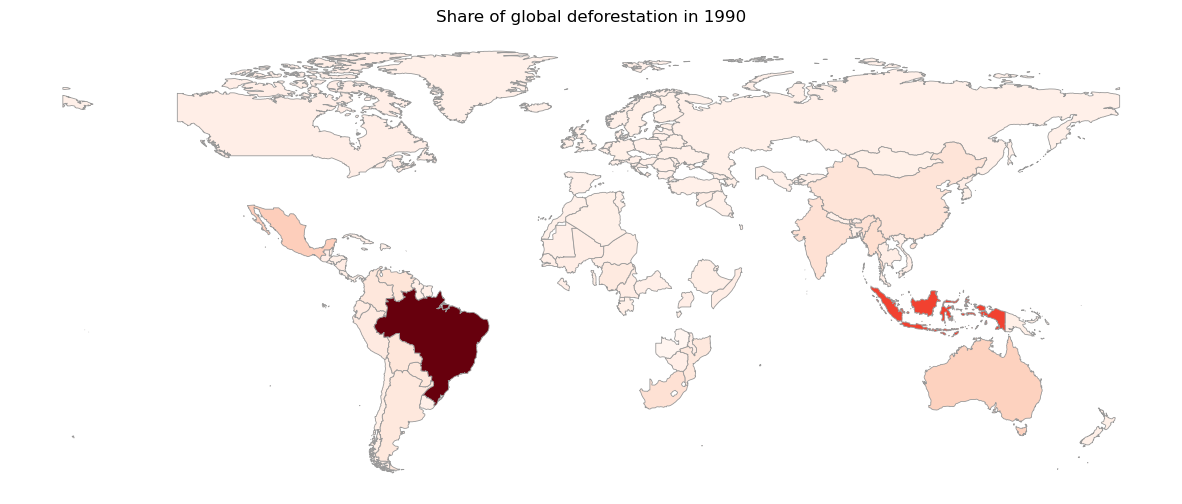

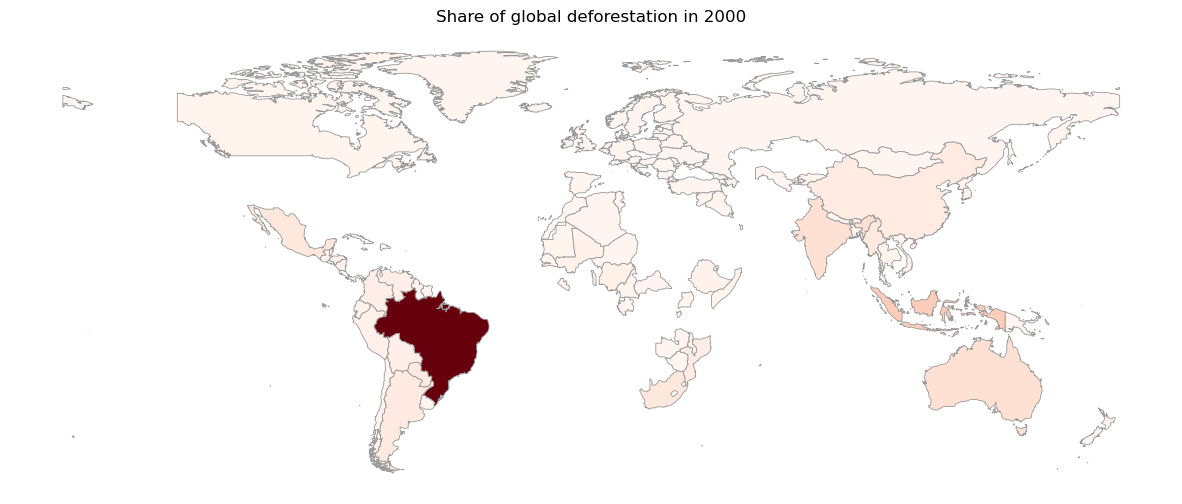

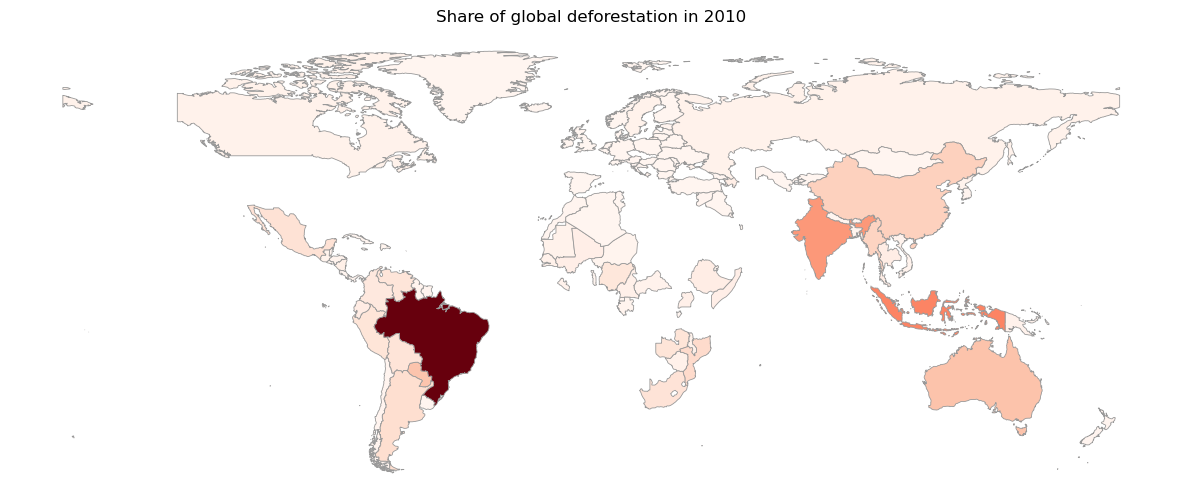

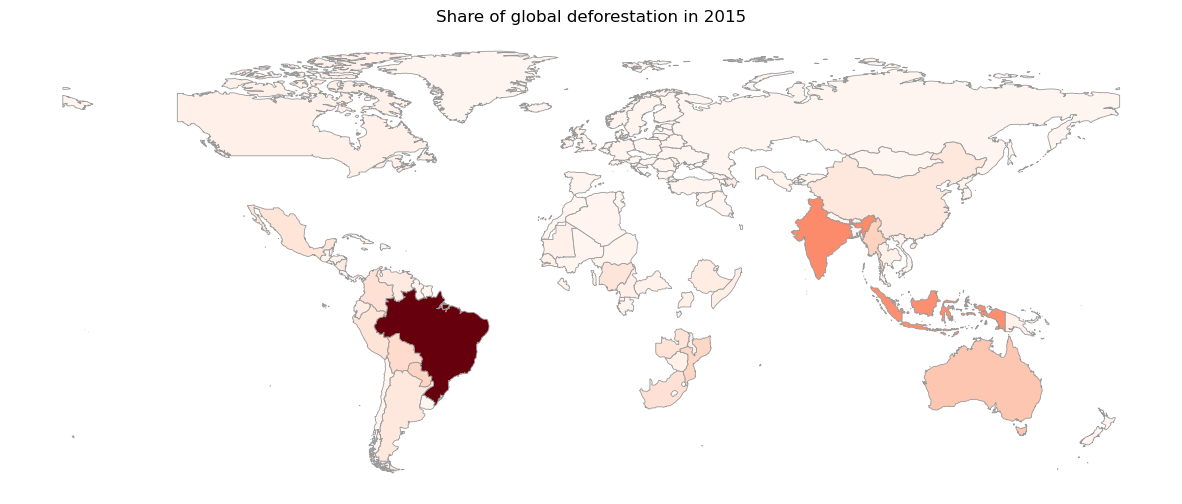

In [30]:
# Create a list of years to loop through
years = [1990, 2000, 2010, 2015]
# Merge world map GeoDataFrame with our df on the Country column
merged = world.merge(df, on='Country')
# Loop through the years and plot a separate map for each year
for year in years:
    # Subset the data to only include the current year
    year_data = merged[merged['Year'] == year]
    
    # Create a new plot for the current year
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot the map for the current year
    year_data.plot(column='share_global_deforestation', cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6')
    
    ax.axis('off')
    ax.set_title('Share of global deforestation in ' + str(year))
    
    # Show the current year plot
    plt.show()


It is obvious to see that Brazil has the highest share of global deforestation for each year we have. This is not particularly surprising as wide-scale deforestation in the Amazon rainforest has been occurring in Brazil all throughout these years in efforts to make space for agriculture, logging, clear land, and exploit its natural resources. Brazil also has much more forest area than most other countries. It is interesting to see that although Brazil reduced forest clearance by 80 percent between 2005 and 2012 (<a href="https://www.cfr.org/amazon-deforestation/#/en">CFR.org</a>), it still clearly owns the greatest share of global deforestation in 2015 and doesn't appear to have lessened. Since 2015, deforestation in Brazil’s Amazon has since increased, and in 2021, it reached a fifteen-year high (<a href="https://www.cfr.org/amazon-deforestation/#/en">CFR.org</a>). As data analysts, examining the extreme detrimental effects this deforestation will have on not only wildlife in Brazil but life (including human life) across the entire globe is important work and could help drive change. If we understand the effects of deforestation, we might be able to reduce those effects quicker and more effectively.<br> <br>
We can also notice from these plots that Indonesia, India, and Australia appear to be the next countries with the greatest share of global deforestation. Interestingly, Indonesia had a very high share of global deforestation in 1990, decreased its share significantly by 2000, but climbed back up in share by 2010 and 2015.

Lets next look at the mean share of global deforestation for countries across all the years we have.

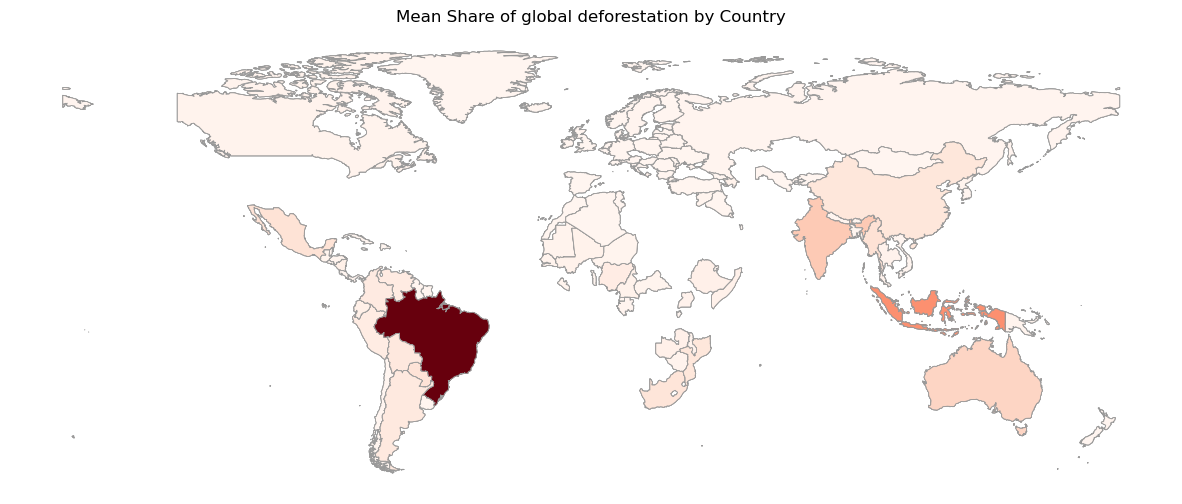

In [31]:
# Merge world map GeoDataFrame with our df on the Country column
merged = world.merge(df, on='Country')

# Group by country and calculate the mean share of global deforestation
grouped = merged.groupby('Country')['share_global_deforestation'].mean().reset_index()

# Merge the mean values back to the merged GeoDataFrame
merged = merged.merge(grouped, on='Country', suffixes=('', '_mean'))

# Plot the map using the plot() method of the GeoDataFrame
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='share_global_deforestation_mean', cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6')
ax.axis('off')
ax.set_title('Mean Share of global deforestation by Country')
plt.show()

The result is not very surprising, with Brazil again being the obvious holder of the greatest mean share of global deforestation. We can also again see that Indonesia, then India, and Australia appear to have the next greatest mean shares in global deforestation. 

Next, lets plot our share of global forest <strong>change</strong> for each country for each year. We'll plot the absolute value of share of global forest change for each country to help us gain a sense of total forest change across the globe from the years 1990 to 2015. Again, forest change is different than deforestation. Forest change could be reforestation for some countries.

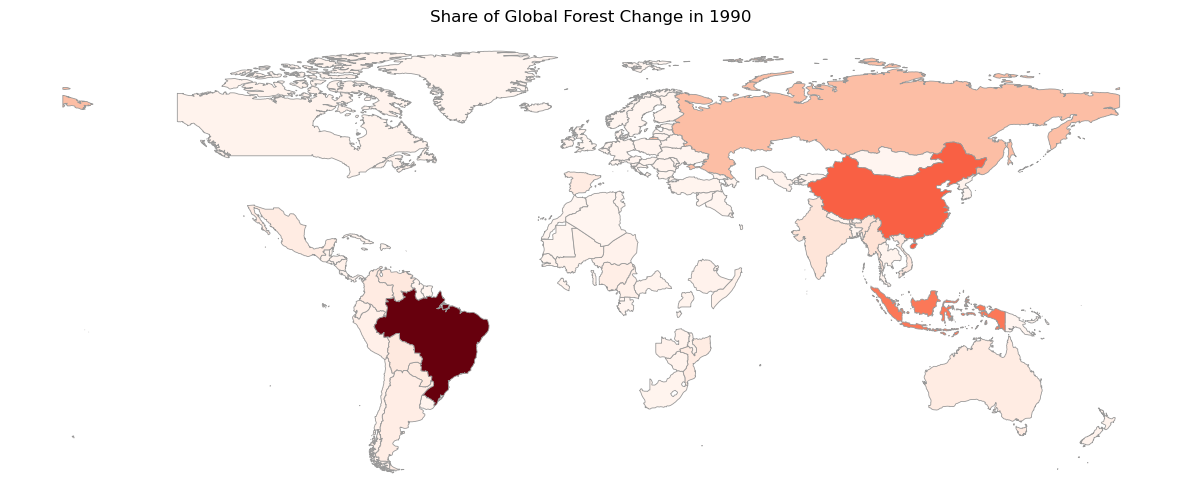

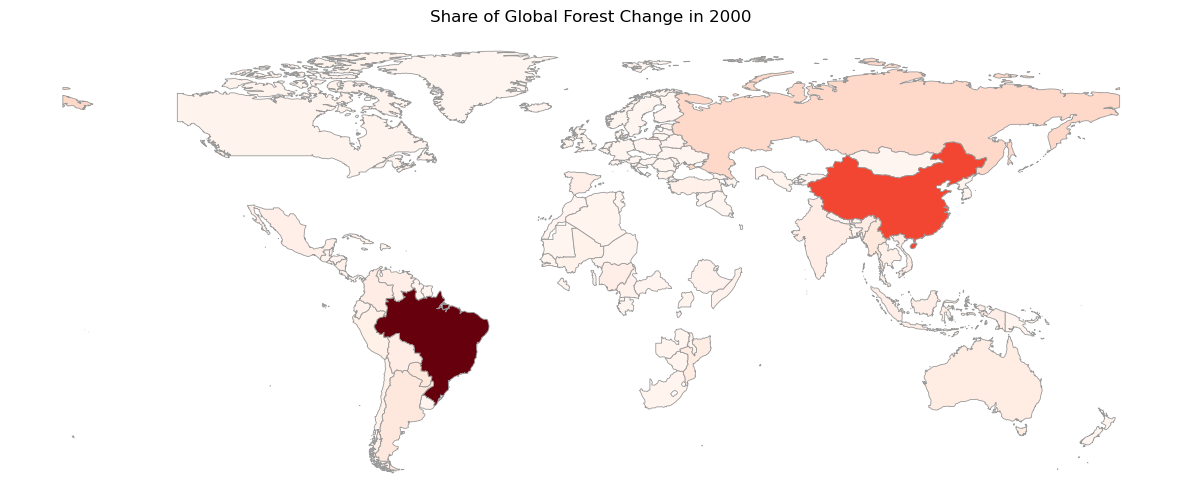

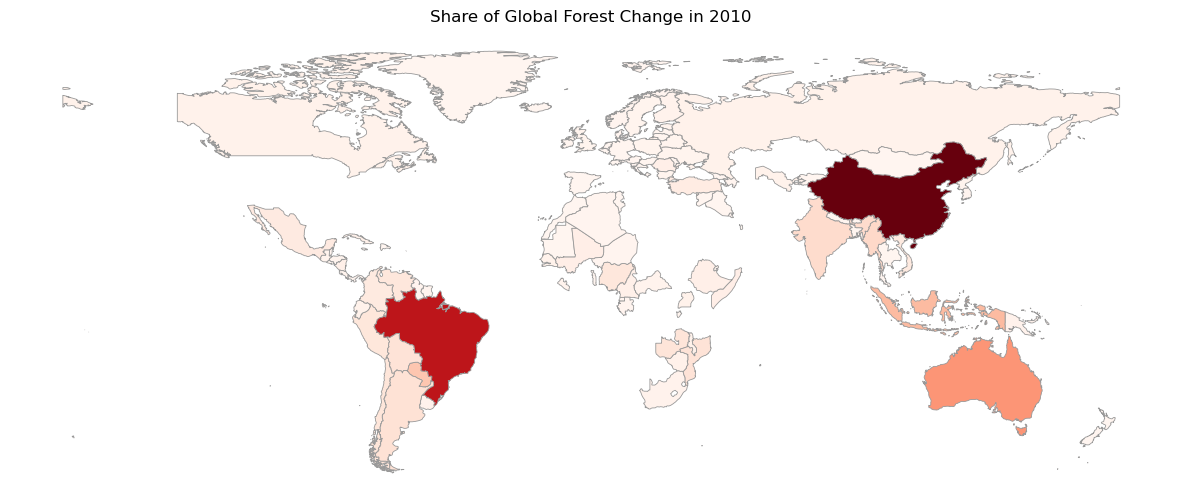

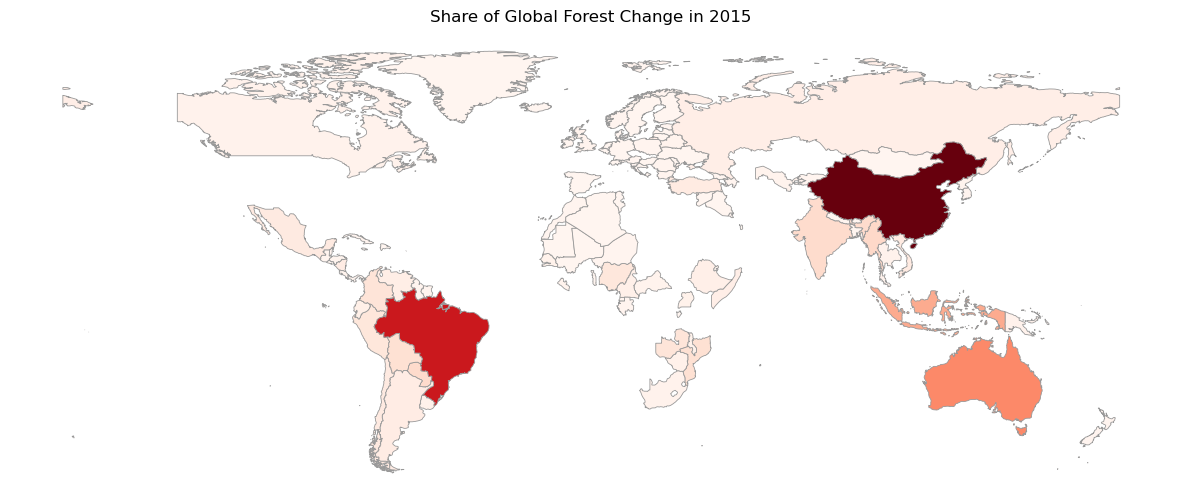

In [32]:
# Create a list of years to loop through
years = [1990, 2000, 2010, 2015]
# Merge world map GeoDataFrame with deforest_df on the Country column
merged = world.merge(df, on='Country')
# Loop through the years and plot a separate map for each year
for year in years:
    # Subset the data to only include the current year
    year_data = merged[merged['Year'] == year]
    
    # Create a new plot for the current year
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot the map for the current year
    year_data.plot(column=abs(year_data['share_global_forest_change']), cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6')
    
    # Turn off axis and set title for the current year plot
    ax.axis('off')
    ax.set_title('Share of Global Forest Change in ' + str(year))
    
    # Show the current year plot
    plt.show()


It is very interesting to see that in these plots, Brazil and Indonesia are not the only countries with a noticeably high share of global forest change, unlike in the share of global deforestation plots. Now we can see that across all years, China has had a very large share of global forest change, even greater than Brazil in 2010 and 2015. Australia is also much darker in the years 2010 and 2015 than it was for our deforestation plots, possibly suggesting that despite being a top contributor to global deforestation, they may have shifted to more reforestation efforts from 2010 on. 

Now we'll plot mean share of global forest change for each country across years.

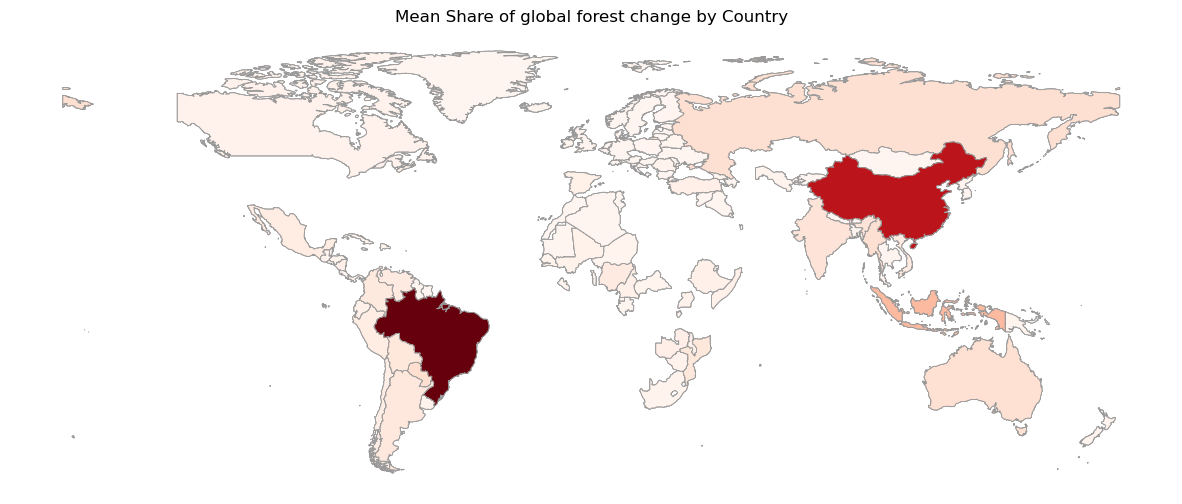

In [33]:
# Merge world map GeoDataFrame with deforest_df on the Country column
merged = world.merge(df, on='Country')

# Group by country and calculate the mean share of global deforestation
grouped = abs(merged.groupby('Country')['share_global_forest_change'].mean()).reset_index()

# Merge the mean values back to the merged GeoDataFrame
merged = merged.merge(grouped, on='Country', suffixes=('', '_mean'))

# Plot the map using the plot() method of the GeoDataFrame
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='share_global_forest_change_mean', cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6')
ax.axis('off')
ax.set_title('Mean Share of global forest change by Country')
plt.show()

Here, we can see that China has had a very large mean share of global forest change over the years 1990-2015. Brazil is still leading, however, the fact that the next highest holder of mean share of global forest change is China, which was not a leader in share of global deforestation, is interesting. The same goes for Russia. This suggests that a large share of global forest change from the years 1990 to 2010 has been from reforestation, not deforestation. Does this mean global net change in forest area is closer to 0 than we might've thought?

Let's actually look at plots of total world forest change over time to see if significant reforestation efforts have helped bring total world forest change closer to 0 or a positive value.

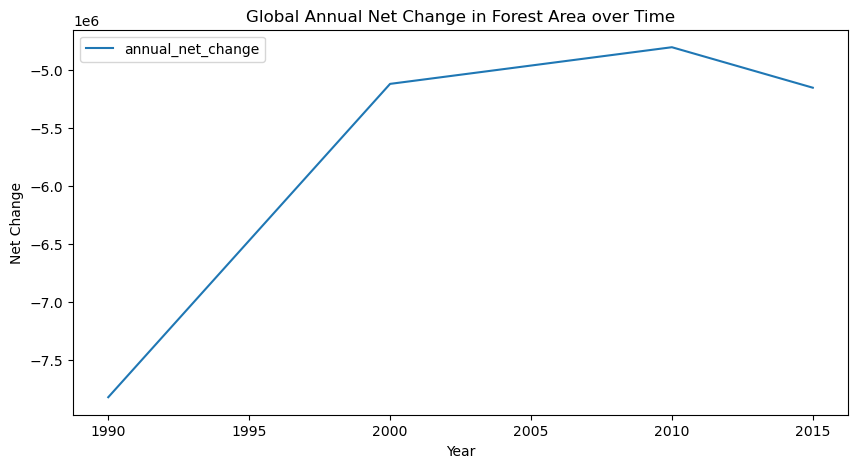

In [34]:
# Plot global annual net change in forest area
world_df.plot(x='Year', y='annual_net_change', kind='line', figsize=(10, 5))
plt.title('Global Annual Net Change in Forest Area over Time')
plt.xlabel('Year')
plt.ylabel('Net Change')
plt.show()

From this plot, we can see that annual net forest change was getting closer to 0--which would mean that reforestation and deforestation were occurring across the globe at the same rate--until 2010, when it began going more negative (meaning more deforestation than reforestation). This is interesting, given that our world maps made it seem as though reforestation was occuring at a similar rate in 2015 and in 2010.  

Now lets view some plots of deforestation vs air pollution deaths to see if there is any statistically significant relationship there.

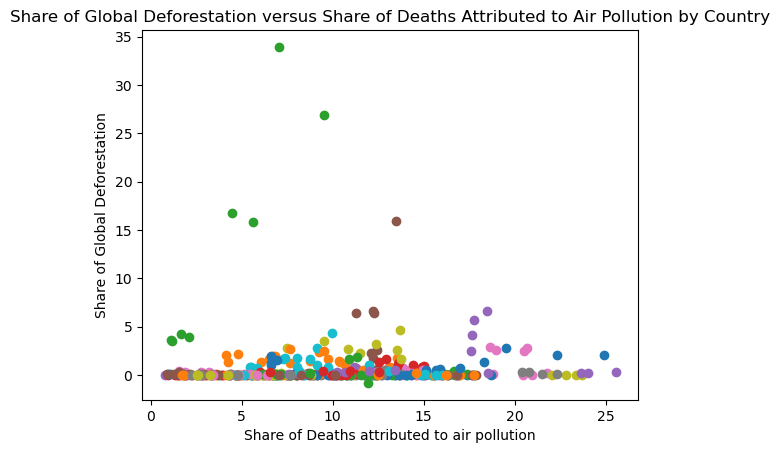

In [35]:
grouped_df = df.groupby('Country')

# Set up the plot
fig, ax = plt.subplots()

# Loop through each country and plot its data
for country_name, data in grouped_df:
    ax.scatter(data['Deaths'], data['share_global_deforestation'])

# Add labels and legend
ax.set_xlabel('Share of Deaths attributed to air pollution')
ax.set_ylabel('Share of Global Deforestation')
ax.set_title("Share of Global Deforestation versus Share of Deaths Attributed to Air Pollution by Country")

# Display the plot
plt.show()

This plot of share of global deforestation versus share of deaths attributed to air pollution per country does not seem to show much of a relationship between the two variables. We can see that most of the countries on the plot have share of global deforestation equal to or very close to 0, yet among them there is a wide variance in values for share of deaths attributed to air pollution. We cannot say that there is any relationship between deforestation and deaths atttributed to air pollution from this plot.

What about if we plot deforestation across countries against deaths attributed to air pollution by year?

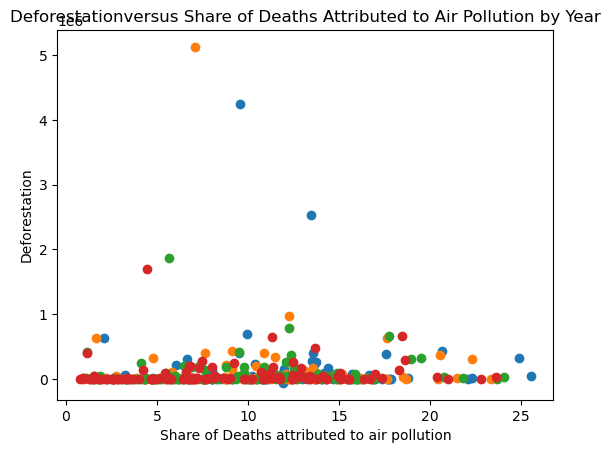

In [36]:
grouped_df = df.groupby('Year')

# Set up the plot
fig, ax = plt.subplots()

# Loop through each year and plot its data
for country_name, data in grouped_df:
    ax.scatter(data['Deaths'], data['Deforestation'])

# Add labels and legend
ax.set_xlabel('Share of Deaths attributed to air pollution')
ax.set_ylabel('Deforestation')
ax.set_title("Deforestationversus Share of Deaths Attributed to Air Pollution by Year")

# Display the plot
plt.show()

Once again, this plot does not give any indication that there is a statistically significant relationship between Deforestation and share of deaths attributed to air pollution.

Now lets examine our Living Planet Index average data. Let us first plot Living Planet Index average by region over time.

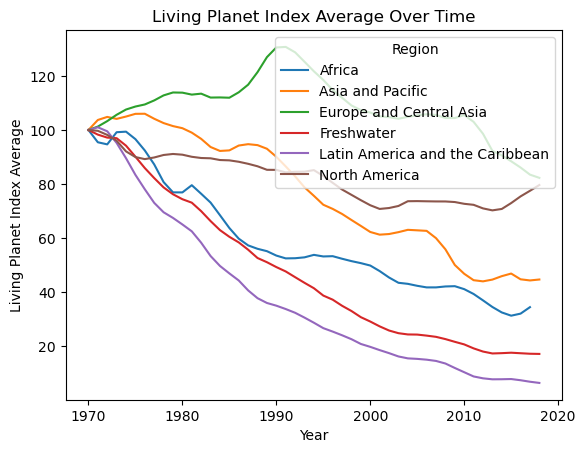

In [37]:
fig, ax = plt.subplots()

lpi.groupby('Region').apply(lambda x: x.plot(x='Year', y='living_planet_index_average', ax=ax, label=x.name))
ax.set_xlabel('Year')
ax.set_ylabel('Living Planet Index Average')
ax.set_title('Living Planet Index Average Over Time')
ax.legend(title='Region')
plt.show()


It is clear to see from this plot that the Living Planet Index average across all regions as been decreasing over time, with Latin America and the Caribbean decreasing at the quickest rate. If we are make a hypothesis now that deforestation affects Living Planet Index, Brazil being in Latin America would help explain why the decrease in Living Planet Index has occured at a very fast rate. 
Interestingly, there was a somewhat significant increase in Living Planet Index in Europe and Central Asia around the early 1990s. So far, it is unclear what this might be attributed to.

Lets do some tidying so that we can merge our continents dataframe (with data on Deforestation and share of global deforestation by continent) with our Living Planet Index average dataframe. That way we can easily assess if there is a relationship between these variables.

In [38]:
# Check continents in our continents dataframe
continents_df['Entity'].unique()

array(['Africa', 'Asia', 'Europe', 'Oceania', 'South America'],
      dtype=object)

In [39]:
# Rename Entity column to Region to match LPI data
continents_df = continents_df.rename(columns={"Entity": "Region"})

In [40]:
# Create a new DataFrame for each region
africa_df = continents_df[continents_df['Region'] == "Africa"].copy()

asia_df = continents_df[continents_df['Region'] == "Asia"].copy()
# Drop region column for Asia df and rename to match LPI df
asia_df = asia_df.drop(columns=['Region'])
asia_df['Region'] = 'Asia and Pacific'

europe_ca_df = continents_df[continents_df['Region'] == "Europe"].copy()
# Drop region column for Europe df and rename to match LPI df
europe_ca_df = europe_ca_df.drop(columns=['Region'])
europe_ca_df['Region'] = 'Europe and Central Asia'

freshwater_df = continents_df[continents_df['Region'] == 'Oceania'].copy()
# Drop region column for Freshwater df and rename to match LPI df
freshwater_df = freshwater_df.drop(columns=['Region'])
freshwater_df['Region'] = 'Freshwater'

lac_df = continents_df[continents_df['Region'] == 'South America'].copy()
# Drop region column for Freshwater df and rename to match LPI df
lac_df = lac_df.drop(columns=['Region'])
lac_df['Region'] = 'Latin America and the Caribbean'

# No data for north america

In [41]:
# Merge all continents back into one df
cols = ['Region', 'Year', 'Deforestation', 'Share of global deforestation']
df_all = pd.merge(africa_df, asia_df, on=cols, how='outer')
df_all = pd.merge(df_all, europe_ca_df, on=cols, how='outer')
df_all = pd.merge(df_all, freshwater_df, on=cols, how='outer')
df_all = pd.merge(df_all, lac_df, on=cols, how='outer')
df_all.head()

,Region,Year,Deforestation,Share of global deforestation
0,Africa,1990,4096000.0,25.894551
1,Africa,2000,4314000.0,28.537408
2,Africa,2010,4444000.0,37.657826
3,Africa,2015,4414000.0,43.487685
4,Asia and Pacific,1990,4170000.0,26.362372


In [42]:
# Merge continents dataframe with LPI
df_all = pd.merge(df_all, lpi, on=['Region', 'Year'], how='inner')
df_all.head()

,Region,Year,Deforestation,Share of global deforestation,living_planet_index_average
0,Africa,1990,4096000.0,25.894551,53.534121
1,Africa,2000,4314000.0,28.537408,49.847821
2,Africa,2010,4444000.0,37.657826,41.113392
3,Africa,2015,4414000.0,43.487685,31.293573
4,Asia and Pacific,1990,4170000.0,26.362372,90.093489


Now, lets plot Deforestation vs LPI by Region

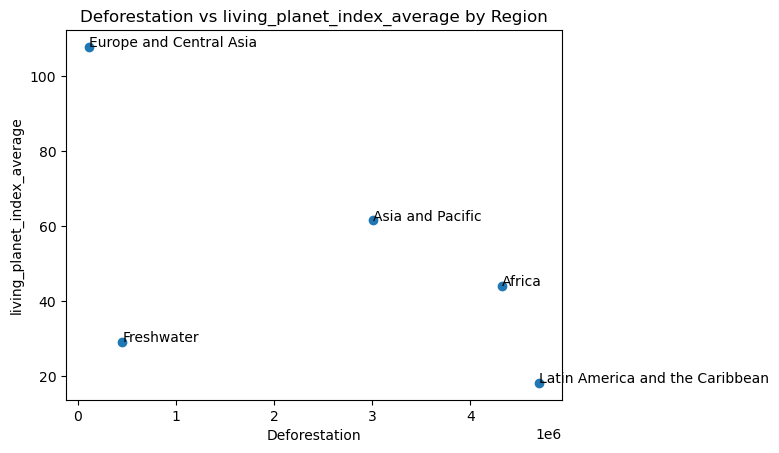

In [43]:
x = df_all.groupby('Region')['Deforestation'].mean()
y = df_all.groupby('Region')['living_planet_index_average'].mean()

fig, ax = plt.subplots()

ax.scatter(x, y)

for i, region in enumerate(x.index):
    ax.text(x[i]+0.05, y[i]+0.05, region)

ax.set_xlabel('Deforestation')
ax.set_ylabel('living_planet_index_average')
ax.set_title('Deforestation vs living_planet_index_average by Region')

plt.show()

Now lets plot for share of global deforestation against LPI, in case it is more normalized.

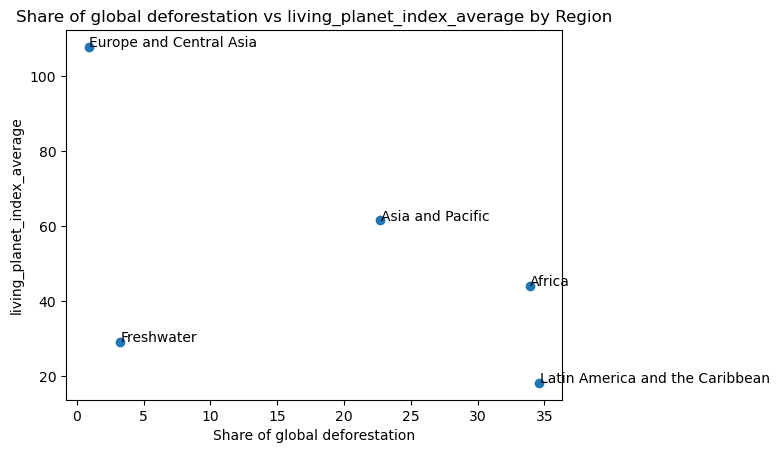

In [44]:
x = df_all.groupby('Region')['Share of global deforestation'].mean()
y = df_all.groupby('Region')['living_planet_index_average'].mean()

fig, ax = plt.subplots()

ax.scatter(x, y)

for i, region in enumerate(x.index):
    ax.text(x[i]+0.05, y[i]+0.05, region)

ax.set_xlabel('Share of global deforestation')
ax.set_ylabel('living_planet_index_average')
ax.set_title('Share of global deforestation vs living_planet_index_average by Region')

plt.show()

If we ignore the Freshwater datapoint, there does appear to be some relationship between deforestation and LPI. Aside from Freshwater, as the share of global deforestation increases, the continents' LPIs decrease. This logically makes sense as many animals are endangered by deforestation. However, it is unclear from this very limited data if there is any real relationship between these variables.

<h2>Model and Interpretation</h2>

Let's try to fit a linear regression model for Living Planet Index average from Deforestation and analyze it's correctness. This will be very difficult as our dataset for LPI is very small, however, it is worth trying.

In [45]:
# Define features = Deforestation, target = Living Planet Index average
X = df_all[['Deforestation']]
y = df_all['living_planet_index_average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared score:', r2)


Mean squared error: 966.1222598238917
R-squared score: -2.515578740006899


Getting a high mean squared error and negative R-squared score not between 0 and 1, means that our model does not fit the data. Again, this may be due to the fact that our dataset is extremely small so our model cannot really be fit very well. Additionally, there is a perceived outlier in our dataset that may be contributing to this.

Lets attempt this again but without the Freshwater data to see what happens

In [46]:
df_all.drop(df_all[df_all['Region'] == 'Freshwater'].index, inplace=True)

In [47]:
# Define features = Deforestation, target = Living Planet Index average
X = df_all[['Deforestation']]
y = df_all['living_planet_index_average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared score:', r2)


Mean squared error: 541.7088127191495
R-squared score: -0.3634030498179217


Once again, a high MSE and negative R-Squared score suggests that our model is still a bad fit for our data and/or we would need more features in order to accurately predict Living Planet Index averages.

Let's attempt to fit a Linear Model to predict air pollution deaths from Deforestation. Although our plots do not suggest a relationship between these variables, it doesn't hurt to try and learn from the results.

In [48]:
# Define features = Deforestation, target = Living Planet Index average
X = df[['Deforestation', 'annual_net_change']]
y = df['Deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared score:', r2)


Mean squared error: 24.84551905539484
R-squared score: 0.025788500183851037


Our MSE is much too high, as it means that our predicted values on average are off by about 24.8 percentage points from the actual values which is unacceptable. And our R-squared much too low as it means that only about 2.6% of the variance in the deaths variable is explained by the deforestation variable in the model. Therefore linear regression with Deforestation as a feature to predict deaths attributed to air pollution is not a good fit for our data.

<h2>Conclusion</h2>

Although we were able to examine and plot some very interesting data, we were not able to fit any models or notice any significant relationships between deforestation and deaths attributed to air pollution or Living Planet Index averages. It's important as data scientists to further investigate the relationship between these and other variables so that we can reduce the detrimental effects of deforestation, reduce deaths by air pollution, and slow or stop the global decrease in biodiversity. Therefore, if given more time and resources, I would like to look further into this field and I hope you do as well.